In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

In [2]:
# exact function definitions and derivatives

pi = np.pi                                  # 3.14..
nx = 200                                    # number of grid points (fine grid)
lx = pi                                     # length of the interval
dx = lx / (nx-1)                            # grid spacing - why divide by (nx-1) instead of (nx)?
                                            # if there are (nx) grid points in the grid, then there are (nx-1) grid spacing

# creating coordinates and functions at the fine grid points
x = np.linspace(0,lx,nx)                    # creating the grid with nx=200 grid points/coordinates for coarse grid points
f = np.exp(x)*np.sin(3*pi*x)                # function at the fine grid


#exact derivative of the function below
dfdx = np.exp(x)*(np.sin(3*pi*x)+3*pi*np.cos(3*pi*x))

In [3]:
# finite differences

nx = 80                                     # no. of grid points (coarse grid)
lx = pi                                     # length of the interval
dx = lx / (nx-1)                            # grid spacing, for (nx) grid points, there are (nx-1) grid spacings

#creating coordinates and functions at coarse grid points
x_c = np.linspace(0,lx,nx)                     # creating grid with nx = 80 grid points/coordinates for coarse grid points        
f_c = np.exp(x_c)*np.sin(3*pi*x_c)          # functions for coarse grid points

# creating containers for the finite differences
df_forward = np.empty(nx)
df_backward = np.empty(nx)
df_centered = np.empty(nx)

for i in range(0,nx-1):                      # last grid point omitted
    df_forward[i] = (f_c[i+1] - f_c[i])/dx
    
for i in range(1,nx):                        # first grid point omitted
    df_backward[i] = (f_c[i] - f_c[i-1])/dx
    
for i in range(1,nx-1):                      # first and last grid points omitted
    df_centered[i] = (f_c[i+1] - f_c[i-1])/(2*dx)

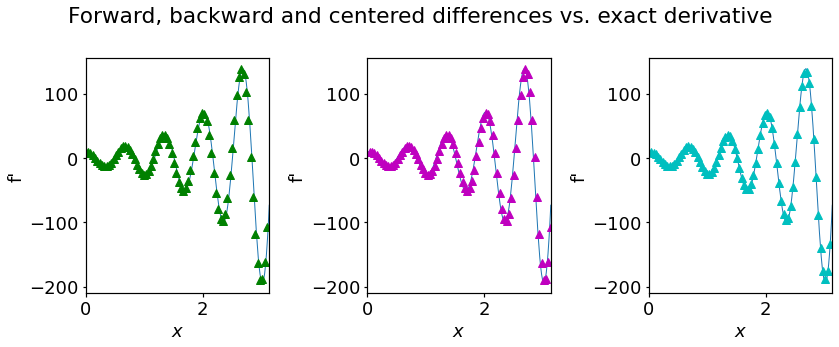

In [4]:
# plotting

fig, ax = plt.subplots(1,3,figsize=(12,5),tight_layout=True)

fig.suptitle('Forward, backward and centered differences vs. exact derivative')

for axis in ax:
    axis.set_xlim(x[0],x[-1])
    
    axis.set_xlabel('$x$')
    axis.set_ylabel("f'")
    
ax[0].plot(x,dfdx)
ax[0].plot(x_c[0:nx-1],df_forward[0:nx-1],'^g')

ax[1].plot(x,dfdx)
ax[1].plot(x_c[1:nx],df_backward[1:nx],'^m')

ax[2].plot(x,dfdx)
ax[2].plot(x_c[1:nx-1],df_centered[1:nx-1],'^c')
